In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=335a6a83af44dcfa651b0c5cc464fa26fb8fc794226b88e54d0d663b4afe459f
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D,AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

from tensorflow import keras
from sklearn import svm, metrics

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.3.0


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 20.6 s


In [ ]:
#provide your url
DATA_PATH= 'drive/My Drive/PATH/'

time: 4.04 ms


In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

time: 3.87 s


In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  20000
Length of y:  20000
time: 1.39 ms


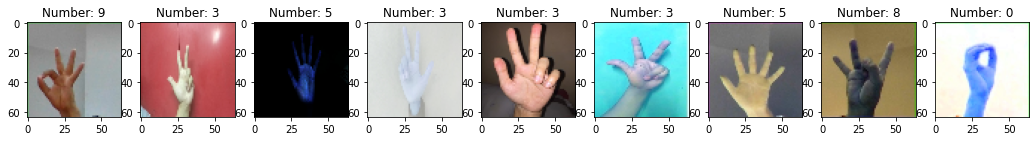

time: 891 ms


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[:9], y[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
x.shape

(20000, 64, 64, 3)

time: 4.42 ms


In [ ]:
IMG_SIZE = 64

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

time: 73.8 ms


In [ ]:
x[0]

In [ ]:
x=x/255.0

time: 1.02 s


In [ ]:
x[0]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, stratify=y)

time: 765 ms


In [ ]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)

xtrain shape:  (16000, 64, 64, 3)
xtest shape:  (4000, 64, 64, 3)
time: 3.35 ms


In [ ]:
zero=[]
for index, (image, label) in enumerate(zip(xtest, ytest)):
  if label ==0:
    zero.append(image)
len(zero)

400

time: 6.36 ms


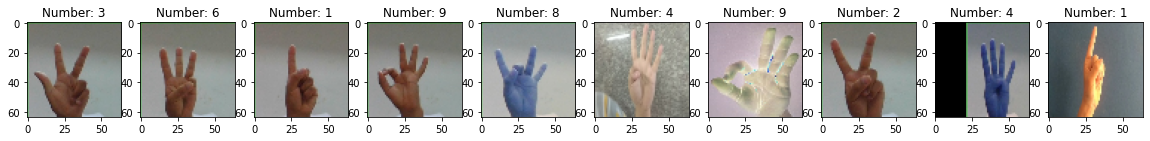

time: 1.22 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtrain[900:910], ytrain[900:910])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
xtrain.shape

(16000, 64, 64, 3)

time: 2.58 ms


In [ ]:
model = Sequential()

model.add(Conv2D(6, (3, 3), input_shape=xtrain.shape[1:], activation='relu'))
model.add(AveragePooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

time: 4.74 s


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 6)         168       
_________________________________________________________________
average_pooling2d (AveragePo (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               376440    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

time: 20.6 ms


In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"

# Call back
mc = ModelCheckpoint(filepath, monitor ='loss', verbose = 1, save_best_only=True, mode = 'max')
es = EarlyStopping(monitor='loss', patience=3, verbose=1, mode='min',restore_best_weights=True)
sheduler_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
callbacks = [mc,es, sheduler_lr]

time: 4.05 ms


In [ ]:
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=500, batch_size=32, verbose=1, callbacks=callbacks)

Epoch 1/500
492/500 [============================>.] - ETA: 0s - loss: 2.0853 - accuracy: 0.2497
Epoch 00001: loss improved from -inf to 2.07317, saving model to weights-improvement-01-0.58.h5
500/500 [==============================] - 4s 7ms/step - loss: 2.0732 - accuracy: 0.2551 - val_loss: 1.4146 - val_accuracy: 0.5828
Epoch 2/500
497/500 [============================>.] - ETA: 0s - loss: 0.9533 - accuracy: 0.7209
Epoch 00002: loss did not improve from 2.07317
500/500 [==============================] - 3s 6ms/step - loss: 0.9515 - accuracy: 0.7216 - val_loss: 0.7110 - val_accuracy: 0.7933
Epoch 3/500
492/500 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.8478
Epoch 00003: loss did not improve from 2.07317
500/500 [==============================] - 3s 6ms/step - loss: 0.5049 - accuracy: 0.8481 - val_loss: 0.5854 - val_accuracy: 0.8335
Epoch 4/500
499/500 [============================>.] - ETA: 0s - loss: 0.3156 - accuracy: 0.9043
Epoch 00004: loss did not imp

In [ ]:
# Test Accuracy
scores = model.evaluate(xtest, steps=len(xtest), verbose=1)
print("Test Accuracy: %.2f%%"%(scores[1]*100))

4000/4000 [==============================] - 7s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test Accuracy: 0.00%
time: 7 s


In [ ]:
# Train Accuracy
scores = model.evaluate(xtrain, steps=len(xtrain), verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

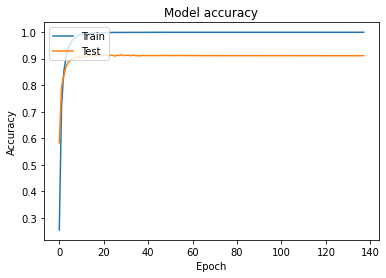

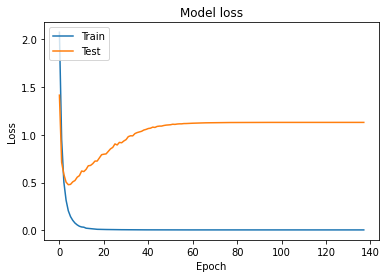

time: 446 ms


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(ytest, y_pred))
# print(val_generator.classes)
print('Classification Report')
target_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'Eight', 'Nine']
print(classification_report(ytest, y_pred, target_names=target_names))

Confusion Matrix
[[383   3   4   1   1   0   1   2   5   0]
 [  1 372   9   3   2   1   1   5   2   4]
 [  1   7 365   4   1   0   9   8   3   2]
 [  0   1   7 364   6   8   2   1   5   6]
 [  0   0   1   5 360   3   9   9   8   5]
 [  2   1   1   4  15 357   3   2   7   8]
 [  3   0   7   5   4   1 362  10   4   4]
 [  2   4   4   0   6   1   7 356  11   9]
 [  7   0   3   4   9   2   2  12 354   7]
 [  1   0   2   3   2  12   2   2   6 370]]
Classification Report
              precision    recall  f1-score   support

        Zero       0.96      0.96      0.96       400
         One       0.96      0.93      0.94       400
         Two       0.91      0.91      0.91       400
       Three       0.93      0.91      0.92       400
        Four       0.89      0.90      0.89       400
        Five       0.93      0.89      0.91       400
         Six       0.91      0.91      0.91       400
       Seven       0.87      0.89      0.88       400
       Eight       0.87      0.89      0.88

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Confusion Matrix')

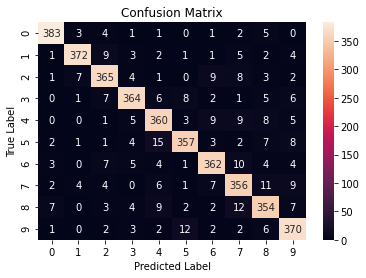

time: 1.17 s


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
correctClass =[]
for label, predict in zip(ytest, y_pred):
  if label != predict:
    misclassifiedIndexes.append(index)
  else:
    correctClass.append(index)

  index +=1
print('Total number of misclassified class: ', len(misclassifiedIndexes))
print('Total number of correctly classified class: ', len(correctClass))
print('Total number testing data: ', len(misclassifiedIndexes)+len(correctClass))

Total number of misclassified class:  851
Total number of correctly classified class:  1149
Total number testing data:  2000
time: 7.19 ms


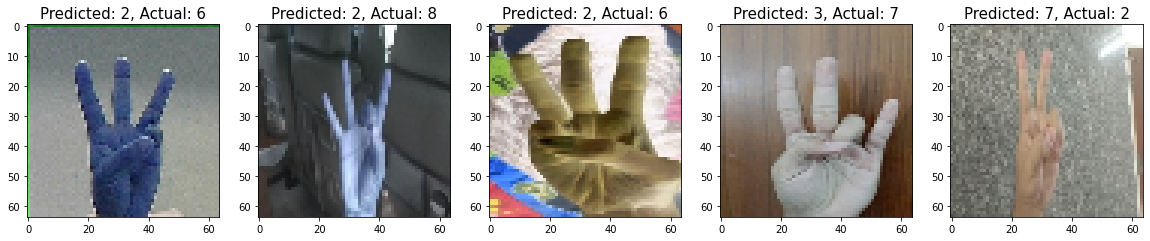

time: 755 ms


In [ ]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
#  plt.imshow(np.reshape(xtest[badIndex]))
 plt.imshow(xtest[badIndex])
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], ytest[badIndex]), fontsize = 15)

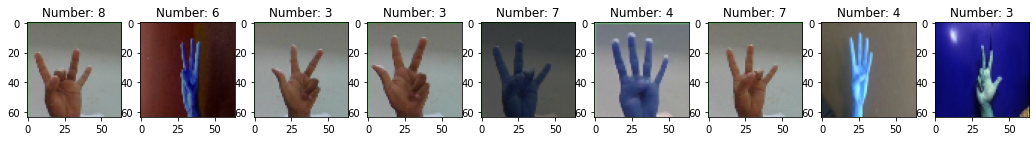

time: 1.06 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtest[:9], ytest[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)